In [1]:
# Q4.ii) Run Apriori algorithm to find frequent itemsets and association rules for grocery dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install efficient_apriori

In [4]:
from efficient_apriori import apriori

In [5]:
groc = pd.read_csv("groceriesDataset.csv")

In [6]:
groc.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#replacing empty value with 0.
groc.fillna(0,inplace=True)

In [8]:
groc

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,tropical fruit,yogurt,coffee,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,0,0,0,0,0,0,0,0,0,0
9831,1,cooking chocolate,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,0,0,0,0,0,0,0,0,0,0
9833,4,semi-finished bread,bottled water,soda,bottled beer,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#for using aprori need to convert data in list format..
transactions = []
for i in range(0,100):
    transactions.append([str(groc.values[i,j]) for j in range(1,33) if str(groc.values[i,j])!='0'])

In [10]:
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [11]:
# Association rule with min_support 60% and min_confidence 60%
itemset,rules = apriori(transactions,min_support = 0.6 , min_confidence = 0.6)

In [12]:
itemset

{}

In [13]:
rules

[]

In [14]:
#Association rule with min_support 5% and min_confidence 10%
itemset,rules = apriori(transactions,min_support = 0.05 , min_confidence = 0.1)

In [15]:
itemset

{1: {('citrus fruit',): 9,
  ('tropical fruit',): 12,
  ('yogurt',): 15,
  ('coffee',): 7,
  ('whole milk',): 25,
  ('other vegetables',): 17,
  ('butter',): 6,
  ('rolls/buns',): 21,
  ('bottled water',): 12,
  ('chocolate',): 6,
  ('curd',): 6,
  ('soda',): 13,
  ('sugar',): 7,
  ('fruit/vegetable juice',): 9,
  ('newspapers',): 9,
  ('pastry',): 9,
  ('detergent',): 6,
  ('root vegetables',): 9,
  ('canned beer',): 8,
  ('sausage',): 8,
  ('brown bread',): 7,
  ('berries',): 6,
  ('whipped/sour cream',): 5,
  ('oil',): 5},
 2: {('other vegetables', 'rolls/buns'): 5,
  ('other vegetables', 'root vegetables'): 5,
  ('other vegetables', 'whole milk'): 7,
  ('rolls/buns', 'sausage'): 5,
  ('rolls/buns', 'soda'): 5,
  ('whole milk', 'yogurt'): 6}}

In [16]:
rules

[{rolls/buns} -> {other vegetables},
 {other vegetables} -> {rolls/buns},
 {root vegetables} -> {other vegetables},
 {other vegetables} -> {root vegetables},
 {whole milk} -> {other vegetables},
 {other vegetables} -> {whole milk},
 {sausage} -> {rolls/buns},
 {rolls/buns} -> {sausage},
 {soda} -> {rolls/buns},
 {rolls/buns} -> {soda},
 {yogurt} -> {whole milk},
 {whole milk} -> {yogurt}]

In [17]:
itemset.keys()

dict_keys([1, 2])

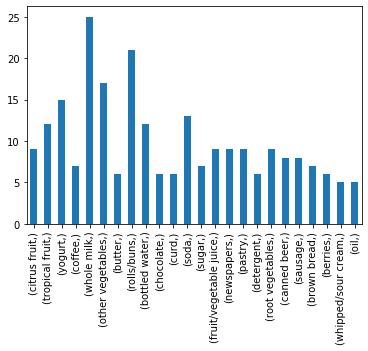

In [18]:
x = []
for i in itemset.keys():
    x.append(pd.Series(itemset[i]))
    
x[0].plot(kind = 'bar')

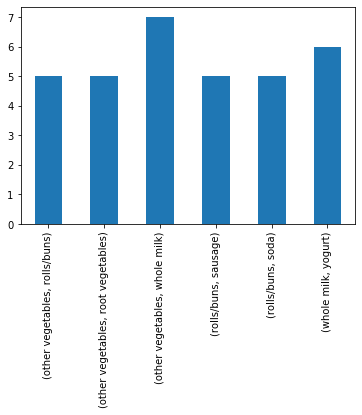

In [19]:
x[1].plot(kind = 'bar')